In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('C:/Users/ahmed/Downloads/auto.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = columns
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Wrangling DATA

In [4]:
df.replace('?',np.nan,inplace = True)
df.dropna(subset =['price'],axis = 0,inplace = True)

### Searching missing values

In [5]:
missing_values = df.isna()
for columns in missing_values.columns.values.tolist():
    print(columns)
    print(missing_values[columns].value_counts())
    print(' ')

symboling
False    201
Name: symboling, dtype: int64
 
normalized-losses
False    164
True      37
Name: normalized-losses, dtype: int64
 
make
False    201
Name: make, dtype: int64
 
fuel-type
False    201
Name: fuel-type, dtype: int64
 
aspiration
False    201
Name: aspiration, dtype: int64
 
num-of-doors
False    199
True       2
Name: num-of-doors, dtype: int64
 
body-style
False    201
Name: body-style, dtype: int64
 
drive-wheels
False    201
Name: drive-wheels, dtype: int64
 
engine-location
False    201
Name: engine-location, dtype: int64
 
wheel-base
False    201
Name: wheel-base, dtype: int64
 
length
False    201
Name: length, dtype: int64
 
width
False    201
Name: width, dtype: int64
 
height
False    201
Name: height, dtype: int64
 
curb-weight
False    201
Name: curb-weight, dtype: int64
 
engine-type
False    201
Name: engine-type, dtype: int64
 
num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64
 
engine-size
False    201
Name: engine-size, dtype: int64

### Replace missing values with mean

In [6]:
normalized_mean = df['normalized-losses'].astype(float).mean()
df['normalized-losses'].replace(np.nan,normalized_mean,inplace = True)

bore_mean = df['bore'].astype(float).mean()
df['bore'].replace(np.nan,bore_mean,inplace = True)

stroke_mean = df['stroke'].astype(float).mean()
df['stroke'].replace(np.nan,stroke_mean,inplace = True)

horsepower_mean = df['horsepower'].astype(float).mean()
df['horsepower'].replace(np.nan,horsepower_mean,inplace = True)

peak_rpm_mean = df['peak-rpm'].astype(float).mean()
df['peak-rpm'].replace(np.nan,peak_rpm_mean,inplace = True)

### Replace missing values in category variable

In [7]:
df['num-of-doors'].replace(np.nan,'four',inplace = True)
df.reset_index(drop=True,inplace = True)
df.head()
#missing_values2 = df.isna()
#for columns in missing_values2.columns.values.tolist():
    #print(columns)
    #print(missing_values2[columns].value_counts())
    #print(' ')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correcting Data types

In [8]:
df.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [9]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")

df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

df[["price"]] = df[["price"]].astype("float")

df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")


In [10]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


### Standardization

In [11]:
df['city-mpg'] = 235/df['city-mpg']

df.rename(columns = {'city-mpg':'city-L/100km'},inplace = True)

df['highway-mpg'] = 235/df['highway-mpg']

df.rename(columns = {'highway-mpg':'highway-L/100km'},inplace = True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


### Normalization

In [12]:
df['length'] = df['length']/df['length'].max()

df['height'] = df['length']/df['height'].max()

df['width'] = df['length']/df['width'].max()

In [13]:
df[['length','height','width']].head()

,length,height,width
0,0.811148,0.013564,0.011266
1,0.811148,0.013564,0.011266
2,0.822681,0.013757,0.011426
3,0.848630,0.014191,0.011787
4,0.848630,0.014191,0.011787


### Binning

In [14]:
df['horsepower'] = df['horsepower'].astype(int)

group_names  = ['low','Medium','High']

bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
#bins
df['horsepower-binned'] = pd.cut(df['horsepower'],bins, labels = group_names, include_lowest = False)

df['horsepower-binned'].value_counts()

low       152
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0, 0.5, 'count')

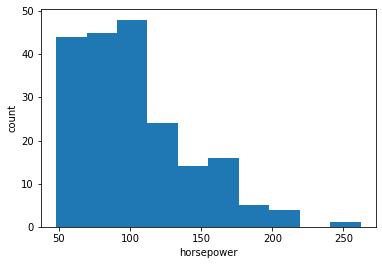

In [15]:
%matplotlib inline

plt.hist(df['horsepower'])

plt.xlabel('horsepower')

plt.ylabel('count')


<BarContainer object of 3 artists>

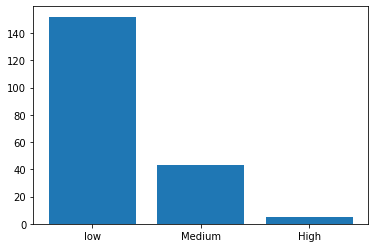

In [16]:
%matplotlib inline

plt.bar(group_names,df['horsepower-binned'].value_counts())

In [17]:
# Normally, Histogram is used to visualize the distribution of bins we created

Text(0.5, 1.0, 'Horsepower')

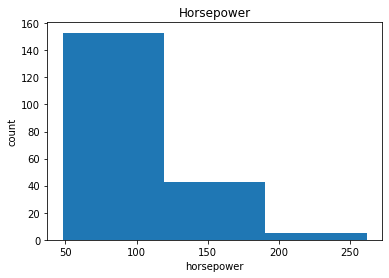

In [18]:
plt.hist(df['horsepower'],bins = bins)
plt.xlabel('horsepower')
plt.ylabel('count')
plt.title('Horsepower')



### Dummy Variable ( Indicator )

In [19]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,low


In [20]:
dummies = pd.get_dummies(df['fuel-type'])
df['diesel'] = dummies['diesel']
df['gas'] = dummies['gas']
df.drop('fuel-type',axis = 1,inplace = True)
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km', 'price',
       'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [21]:
dummies2 = pd.get_dummies(df['aspiration'])
df['std'] = dummies2['std']
df['turbo'] = dummies2['turbo']
df.drop('aspiration',axis = 1,inplace = True)


In [22]:
df.rename(columns={'std':'aspiration-std'},inplace = True)
df.rename(columns={'turbo':'aspiration-turbo'},inplace= True)

In [23]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.011266,...,111,5000.0,11.190476,8.703704,13495.0,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.011266,...,111,5000.0,11.190476,8.703704,16500.0,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.011426,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.011787,...,102,5500.0,9.791667,7.833333,13950.0,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.011787,...,115,5500.0,13.055556,10.681818,17450.0,low,0,1,1,0


## What are the main charateristics which have the most impact on the price?

In [24]:
df.rename(columns = {'aspiration-std':'std','aspiration-turbo':'turbo'},inplace = True)

dummies2 = df[['std','turbo']]

s2 = dummies2.idxmax(axis=1)

s2.to_frame()

,0
0,std
1,std
2,std
3,std
4,std
...,...
196,std
197,turbo
198,std
199,turbo


In [25]:
df['aspiration'] = s2
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas,std,turbo,aspiration
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.011266,...,5000.0,11.190476,8.703704,13495.0,low,0,1,1,0,std
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.011266,...,5000.0,11.190476,8.703704,16500.0,low,0,1,1,0,std
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.011426,...,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0,std
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.011787,...,5500.0,9.791667,7.833333,13950.0,low,0,1,1,0,std
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.011787,...,5500.0,13.055556,10.681818,17450.0,low,0,1,1,0,std


In [26]:
cols = df.columns.tolist()
cols.insert(5, cols.pop(cols.index('aspiration')))
df = df.reindex(columns= cols)


In [27]:
df.drop('std',axis=1,inplace = True)
df.drop('turbo',axis=1,inplace = True)

In [28]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,aspiration,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,two,convertible,std,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,low,0,1
1,3,122,alfa-romero,two,convertible,std,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,low,0,1
2,1,122,alfa-romero,two,hatchback,std,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,four,sedan,std,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,low,0,1
4,2,164,audi,four,sedan,std,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,low,0,1


In [29]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.365404,-0.365404,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,0.066171,-0.029807,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.019424,0.019424,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.876024,0.876024,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.476153,0.577576,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,1.000000,1.000000,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187
width,-0.365404,0.019424,0.876024,1.000000,1.000000,1.000000,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187
height,-0.365404,0.019424,0.876024,1.000000,1.000000,1.000000,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.880665,0.880665,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.685025,0.685025,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.745059,0.783465,0.872335,0.070779,-0.070779
bore,-0.139896,-0.029800,0.493203,0.608941,0.608941,0.608941,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.554726,0.559197,0.543154,0.054435,-0.054435
stroke,-0.007992,0.055127,0.157964,0.123913,0.123913,0.123913,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.036285,0.047199,0.082267,0.241033,-0.241033


### Scatterplot of Numerical variables and price

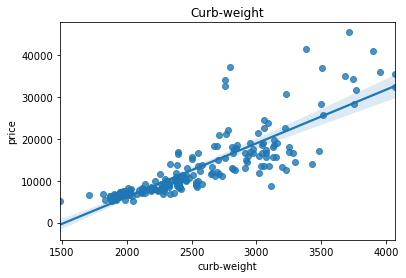

In [30]:
%matplotlib inline
sns.regplot(x='curb-weight',y='price',data=df)
plt.title('Curb-weight')
plt.show()

Positive linear Regression

In [31]:
df[['curb-weight','price']].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


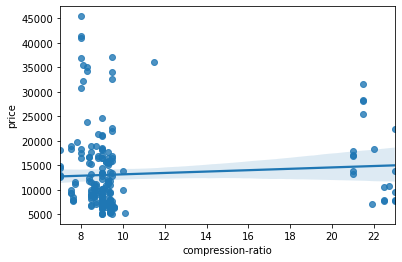

In [32]:
sns.regplot(x='compression-ratio',y='price',data=df)

Compression-Ratio is not good indicator of price since regression line is almost horizontal and data points are all scattered

In [33]:
df[['compression-ratio','price']].corr()

,compression-ratio,price
compression-ratio,1.000000,0.071107
price,0.071107,1.000000


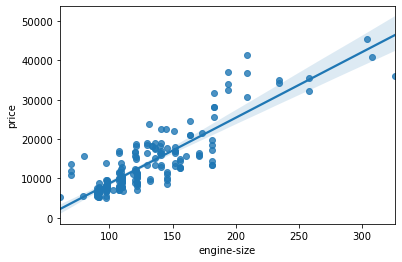

In [34]:
sns.regplot(x='engine-size',y='price',data=df)

Engine-size is good predictor of price.

In [35]:
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


### Boxplot of Categorical Variable and Price

In [36]:
df.describe(include = object)

,make,num-of-doors,body-style,aspiration,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,2,3,2,6,7,8
top,toyota,four,sedan,std,fwd,front,ohc,four,mpfi
freq,32,115,94,165,118,198,145,157,92


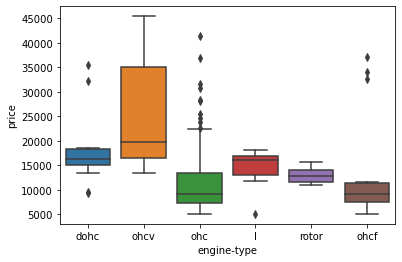

In [37]:
sns.boxplot(x='engine-type',y='price',data=df)

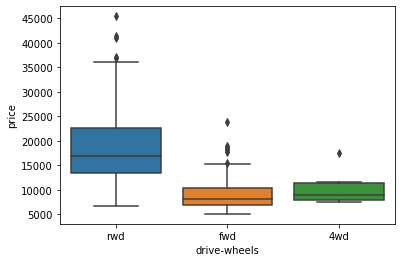

In [38]:
sns.boxplot(x='drive-wheels',y='price',data=df)

Drive-wheels is a good predictor of our target i.e Price. Boxes don't overlap with each other which suggest have impact on price.

In [39]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


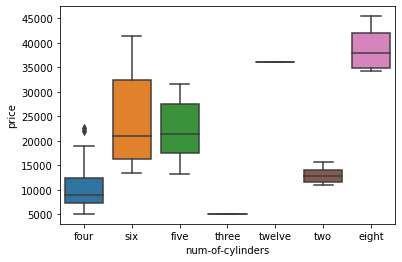

In [40]:
sns.boxplot(x='num-of-cylinders',y='price',data=df)

In [41]:
df['num-of-cylinders'].value_counts().to_frame()

,num-of-cylinders
four,157
six,24
five,10
eight,4
two,4
twelve,1
three,1


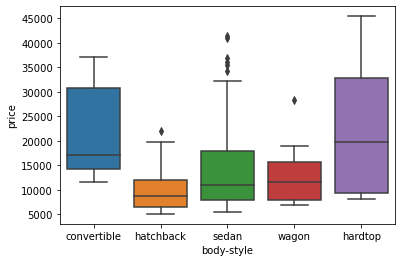

In [42]:
sns.boxplot(x='body-style',y='price',data=df)

Most of the boxes overlapping each other which suggest body-style is not good predictor of price.

In [43]:
df['body-style'].value_counts().to_frame()

,body-style
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


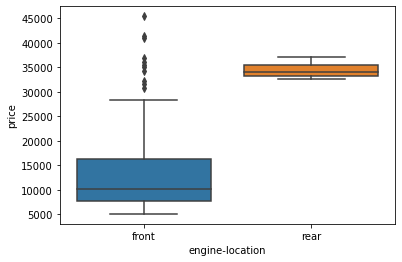

In [44]:
sns.boxplot(x='engine-location',y='price',data=df)

In [45]:
df['engine-location'].value_counts().to_frame()

,engine-location
front,198
rear,3


## Value Counts

In [46]:
df.describe(include=object)

,make,num-of-doors,body-style,aspiration,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,2,3,2,6,7,8
top,toyota,four,sedan,std,fwd,front,ohc,four,mpfi
freq,32,115,94,165,118,198,145,157,92


In [47]:
body_style = df['body-style'].value_counts().to_frame()

body_style.rename(columns = {'body-style':'value_counts'},inplace = True)

body_style.index.name = 'body-style'

body_style

,value_counts
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [48]:
engine_type = df['num-of-doors'].value_counts().to_frame()

engine_type.rename(columns ={'num-of-doors':'value_counts'},inplace = True)

engine_type.index.name = 'num-of-doors'

engine_type

,value_counts
num-of-doors,
four,115
two,86


## Grouping

In [49]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,aspiration,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas
0,3,122,alfa-romero,two,convertible,std,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0,low,0,1
1,3,122,alfa-romero,two,convertible,std,rwd,front,88.6,0.811148,...,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0,low,0,1
2,1,122,alfa-romero,two,hatchback,std,rwd,front,94.5,0.822681,...,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1
3,2,164,audi,four,sedan,std,fwd,front,99.8,0.848630,...,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0,low,0,1
4,2,164,audi,four,sedan,std,4wd,front,99.4,0.848630,...,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0,low,0,1


In [50]:
df2 = df[['price','drive-wheels','body-style']]

df2_grouped = df2.groupby(['drive-wheels','body-style'],as_index = False).mean()

df2_grouped

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [51]:
#df2 = df[['drive-wheels','engine-type','price']]

df_pivot = df2_grouped.pivot(index='body-style',columns='drive-wheels')
df_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

In [52]:
df_pivot = df_pivot.fillna(0)
df_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible       0.000000  11595.000000  23949.600000
hardtop           0.000000   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

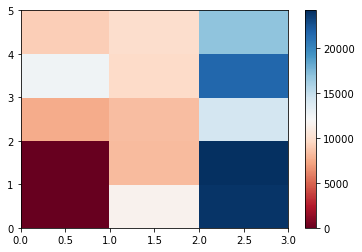

In [53]:
%matplotlib inline

plt.pcolor(df_pivot,cmap='RdBu')

plt.colorbar()

plt.show()

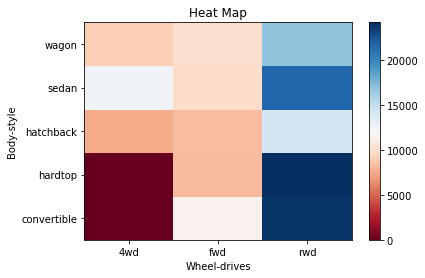

In [54]:
fig, ax = plt.subplots()

sa = ax.pcolor(df_pivot,cmap='RdBu')

#Set ticks
ax.set_xticks(np.arange(df_pivot.shape[1])+0.5)
ax.set_yticks(np.arange(df_pivot.shape[0])+0.5)

#Label Name
xlabels = df_pivot.columns.levels[1]
ylabels= df_pivot.index

#Set ticks Names
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)

plt.title('Heat Map')

plt.xlabel('Wheel-drives')

plt.ylabel('Body-style')




fig.colorbar(sa)

In [55]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.365404,-0.365404,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,0.066171,-0.029807,-0.082391,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.019424,0.019424,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.876024,0.876024,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.476153,0.577576,0.584642,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,1.000000,1.000000,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187
width,-0.365404,0.019424,0.876024,1.000000,1.000000,1.000000,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187
height,-0.365404,0.019424,0.876024,1.000000,1.000000,1.000000,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628,0.211187,-0.211187
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.880665,0.880665,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.685025,0.685025,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.745059,0.783465,0.872335,0.070779,-0.070779
bore,-0.139896,-0.029800,0.493203,0.608941,0.608941,0.608941,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.554726,0.559197,0.543154,0.054435,-0.054435
stroke,-0.007992,0.055127,0.157964,0.123913,0.123913,0.123913,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.036285,0.047199,0.082267,0.241033,-0.241033


### Pearson Correlation Coefficient

In [56]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print('The Pearson correlation coefficient is:',pearson_coef,'\nP-value is',p_value)

The Pearson correlation coefficient is: 0.584641822265508 
P-value is 8.076488270733218e-20


In [57]:
pearson_coef, p_value = stats.pearsonr(df['peak-rpm'],df['price'])
print('The Pearson correlation coefficient is:',pearson_coef,'\nP-value is',p_value)

The Pearson correlation coefficient is: -0.10154203145050207 
P-value is 0.15147575707430075


The P-value of pearson correlaton between wheel base and price is statistally significient, although the linear relationship isn't extremely weak (-0.101))

In [58]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print('The Pearson correlation coefficient is:',pearson_coef,'\nP-value is',p_value)

The Pearson correlation coefficient is: 0.8097290352560285 
P-value is 5.924001027593172e-48


In [59]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print('The Pearson correlation coefficient is:',pearson_coef,'\nP-value is',p_value)

The Pearson correlation coefficient is: 0.584641822265508 
P-value is 8.076488270733218e-20


## ANOVA

In [60]:
grouped_test = df2[['drive-wheels','price']].groupby(['drive-wheels'])
grouped_test.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
6,fwd,17710.0
7,fwd,18920.0
8,fwd,23875.0
9,rwd,16430.0


In [61]:
grouped_test.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [62]:
f_value, p_value = stats.f_oneway(grouped_test.get_group('4wd')['price'],grouped_test.get_group('fwd')['price'],grouped_test.get_group('rwd')['price'])
print('The f_value is:',f_value,'and p_value is :',p_value)

The f_value is: 67.95406500780399 and p_value is : 3.3945443577151245e-23


In [63]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [64]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('fwd')['price'], grouped_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.6654657502523033 , P = 0.41620116697845666


In [84]:
f_val, p_val = stats.f_oneway(grouped_test.get_group('rwd')['price'], grouped_test.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )



ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


### Variables which have impact on the price of Car

Length

Width

Curb-weight

Engine-size

Horsepower

City-mpg

Highway-mpg

Wheel-base

Bore

Categorical Variable

Drive-wheels

## Machine Learning Algorithms to Predict price of Car

### Single Linear Regression /MLR

In [185]:
from sklearn.metrics import mean_absolute_error

lm = LinearRegression()

X = df[['horsepower','length','width','curb-weight','engine-size','city-L/100km','highway-L/100km','wheel-base','bore']]
y = df['price']

X_train,X_val,y_train,y_val = train_test_split(X,y)

lm.fit(X_train,y_train)

pred = lm.predict(X_val)

error = mean_absolute_error(y_val,pred)

print('Multiple Linear Regression \nMean Absolute error : %d ' %(error))

Multiple Linear Regression 
Mean Absolute error : 2346 


In [186]:
from sklearn.tree import DecisionTreeRegressor

model_Tree = DecisionTreeRegressor()

model_Tree.fit(X_train,y_train)

pred_Tree = model_Tree.predict(X_val)

error_Tree = mean_absolute_error(y_val,pred_Tree)

print('Decision Tree Regressor \nMean Absolute error : %d'%(error_Tree))

Decision Tree Regressor 
Mean Absolute error : 1684


In [187]:
from sklearn.ensemble import RandomForestRegressor

model_Forest = RandomForestRegressor()

model_Forest.fit(X_train,y_train)

pred_Forest = model_Forest.predict(X_val)

error_Forest = mean_absolute_error(y_val,pred_Forest)

print('Random Forest Regressor \nMean Absolute error : %d'%(error_Forest))

Random Forest Regressor 
Mean Absolute error : 1282


In [167]:
f = np.polyfit(X_train['horsepower'],y_train,3)

p = np.poly1d(f)

print(p)

          3         2
0.005614 x - 1.583 x + 288.5 x - 6280


### Model Evaluation using Visualization

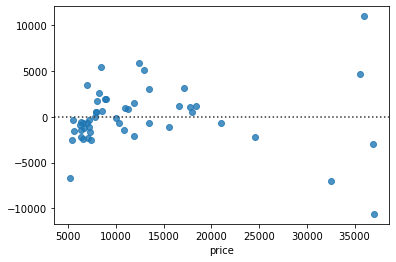

In [148]:
sns.residplot(y_val,pred)

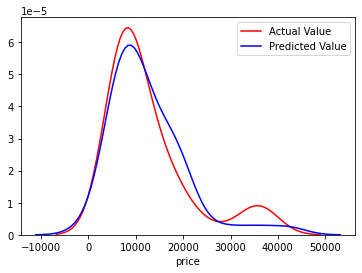

In [147]:
ax1 = sns.distplot(y_val,color = 'r',hist= False, label='Actual Value')

sns.distplot(pred,color = 'b', hist= False,label = 'Predicted Value',ax = ax1)


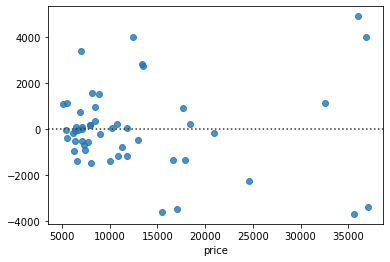

In [149]:
sns.residplot(y_val,pred_Tree)

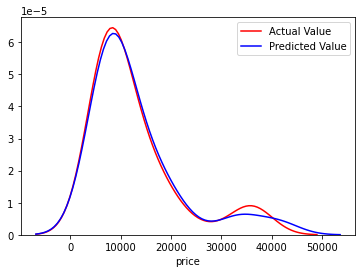

In [157]:
ax1 = sns.distplot(y_val,color = 'r',hist= False, label='Actual Value')

sns.distplot(pred_Tree,color = 'b', hist= False,label = 'Predicted Value',ax = ax1)


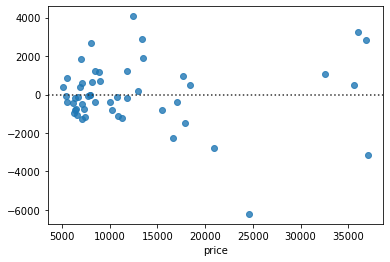

In [152]:
sns.residplot(y_val,pred_Forest)

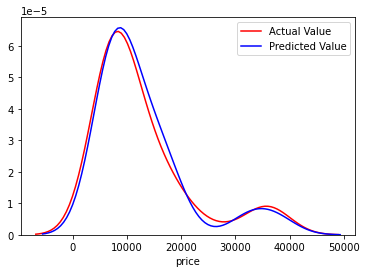

In [158]:
ax1 = sns.distplot(y_val,color = 'r',hist= False, label='Actual Value')

sns.distplot(pred_Forest,color = 'b', hist= False,label = 'Predicted Value',ax = ax1)


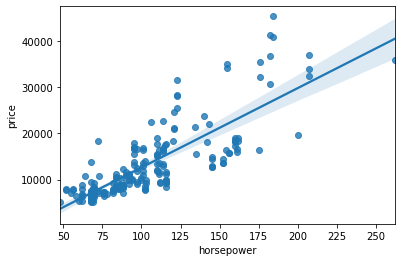

In [195]:
sns.regplot(x='horsepower',y='price',data=df)